In [1]:
import matplotlib.pyplot as plt
import pandas as pds
import numpy as np

In [2]:
dat = pds.read_csv('results2021/real_results.txt', sep=' ', header=None)

In [3]:
dat.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11
14,bmc,real_1000,0.266,0.004,-0.096,0.018,259.065,1.263,1.177,0.004,1.200,0.004
15,overlap,real_1000,0.241,0.004,-0.217,0.020,316.114,1.046,1.166,0.004,1.426,0.006
16,dor,real_1500,0.255,0.005,-0.096,0.020,228.086,1.513,1.091,0.004,1.116,0.004
17,scp,real_1500,0.276,0.004,0.056,0.018,224.415,1.325,1.125,0.003,1.062,0.004
18,propensity,real_1500,0.306,0.005,0.055,0.018,225.639,1.454,1.208,0.004,1.117,0.004
19,vsr,real_1500,0.268,0.004,-0.096,0.020,233.620,1.560,1.127,0.004,1.140,0.005
20,tarnet,real_1500,0.163,0.004,-0.984,0.038,335.386,1.297,1.896,0.008,1.856,0.008
21,drcrn,real_1500,0.143,0.004,-1.072,0.035,379.619,1.396,1.498,0.005,1.929,0.008
22,bmc,real_1500,0.265,0.004,-0.083,0.020,236.400,1.502,1.095,0.004,1.118,0.005
23,overlap,real_1500,0.320,0.005,-0.037,0.020,238.089,1.421,1.245,0.004,1.215,0.005


In [4]:
n_sample = [int(x[1]) for x in dat[1].str.split('_')]
dat['level'] = n_sample

In [5]:
dat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,level
0,dor,real_500,0.251,0.004,-0.120,0.017,282.290,0.860,1.173,0.003,1.257,0.004,500
1,scp,real_500,0.278,0.004,-0.052,0.016,230.460,1.345,1.059,0.003,1.117,0.004,500
2,propensity,real_500,0.283,0.004,-0.146,0.017,295.403,0.787,1.163,0.003,1.354,0.005,500
3,vsr,real_500,0.279,0.004,-0.258,0.017,270.254,1.205,1.146,0.003,1.246,0.004,500
4,tarnet,real_500,0.064,0.003,-1.330,0.031,393.166,0.958,1.307,0.004,2.028,0.006,500


In [6]:
rename_dict = {
    'dor': 'NN', 'tarnet': 'CFR', 'cfrnet': 'CFR', 'propensity': 'NN-IPW', 'vsr': 'VSR', 'scp': 'SCP', 'drcrn': 'DR-CRN', 'bmc': 'BMC', 'overlap': 'Overlap'
}

In [7]:
names = [rename_dict[x] for x in dat[0]]

In [8]:
dat['method'] = names

In [9]:
dat['nDCG'] = [f"{x:.3f}"[1:] + ' ({})'.format(str(round(y, 4))[1:]) for x, y in zip(dat[2], dat[3])]

In [10]:
dat['Impv'] = [f"{10*x:.2f}" + ' ({})'.format(f"{10*y:.2f}"[1:]) for x, y in zip(dat[4], dat[5])]

In [11]:
dat['Rank'] = [f"{x:.1f}" + ' ({})'.format(str(round(y, 1))) for x, y in zip(dat[6], dat[7])]

In [12]:
dat['PEHE'] = [f"{x:.3f}" + ' ({})'.format(str(round(y, 4))) for x, y in zip(dat[8], dat[9])]

In [13]:
dat['RMSE'] = [f"{x:.3f}" + ' ({})'.format(str(round(y, 4))) for x, y in zip(dat[10], dat[11])]

In [14]:
df4 = dat.pivot(index='method', columns='level', values='PEHE')
df4

level,500,1000,1500
method,,,
BMC,1.199 (0.003),1.177 (0.004),1.095 (0.004)
CFR,1.307 (0.004),1.490 (0.005),1.896 (0.008)
DR-CRN,1.333 (0.004),1.400 (0.004),1.498 (0.005)
NN,1.173 (0.003),1.189 (0.004),1.091 (0.004)
NN-IPW,1.163 (0.003),1.362 (0.003),1.208 (0.004)
Overlap,1.153 (0.003),1.166 (0.004),1.245 (0.004)
SCP,1.059 (0.003),1.125 (0.003),1.125 (0.003)
VSR,1.146 (0.003),1.180 (0.004),1.127 (0.004)


In [15]:
df5 = dat.pivot(index='method', columns='level', values='RMSE')
df5

level,500,1000,1500
method,,,
BMC,1.268 (0.004),1.200 (0.004),1.118 (0.005)
CFR,2.028 (0.006),1.924 (0.007),1.856 (0.008)
DR-CRN,2.118 (0.006),2.005 (0.008),1.929 (0.008)
NN,1.257 (0.004),1.383 (0.006),1.116 (0.004)
NN-IPW,1.354 (0.005),1.244 (0.003),1.117 (0.004)
Overlap,1.365 (0.005),1.426 (0.006),1.215 (0.005)
SCP,1.117 (0.004),1.098 (0.004),1.062 (0.004)
VSR,1.246 (0.004),1.186 (0.004),1.140 (0.005)


In [16]:
df1 = dat.pivot(index='method', columns='level', values='nDCG')
df1

level,500,1000,1500
method,,,
BMC,.309 (.004),.266 (.004),.265 (.004)
CFR,.064 (.003),.102 (.003),.163 (.004)
DR-CRN,.108 (.002),.059 (.002),.143 (.004)
NN,.251 (.004),.234 (.004),.255 (.005)
NN-IPW,.283 (.004),.238 (.005),.306 (.005)
Overlap,.298 (.004),.241 (.004),.320 (.005)
SCP,.278 (.004),.286 (.004),.276 (.004)
VSR,.279 (.004),.274 (.004),.268 (.004)


In [17]:
df2 = dat.pivot(index='method', columns='level', values='Impv')
df2

level,500,1000,1500
method,,,
BMC,-1.10 (.17),-0.96 (.18),-0.83 (.20)
CFR,-13.30 (.31),-22.55 (.30),-9.84 (.38)
DR-CRN,-10.65 (.29),-10.74 (.31),-10.72 (.35)
NN,-1.20 (.17),-1.15 (.19),-0.96 (.20)
NN-IPW,-1.46 (.17),-0.92 (.21),0.55 (.18)
Overlap,-1.03 (.17),-2.17 (.20),-0.37 (.20)
SCP,-0.52 (.16),-0.06 (.17),0.56 (.18)
VSR,-2.58 (.17),-0.96 (.18),-0.96 (.20)


In [18]:
df3 = dat.pivot(index='method', columns='level', values='Rank')
df3

level,500,1000,1500
method,,,
BMC,283.9 (0.8),259.1 (1.3),236.4 (1.5)
CFR,393.2 (1.0),380.8 (1.1),335.4 (1.3)
DR-CRN,401.1 (1.0),391.2 (1.1),379.6 (1.4)
NN,282.3 (0.9),321.6 (1.0),228.1 (1.5)
NN-IPW,295.4 (0.8),253.0 (1.0),225.6 (1.5)
Overlap,287.8 (0.8),316.1 (1.0),238.1 (1.4)
SCP,230.5 (1.3),221.2 (1.4),224.4 (1.3)
VSR,270.3 (1.2),253.4 (1.4),233.6 (1.6)


In [19]:
df1.to_csv('real_df1.csv')
df2.to_csv('real_df2.csv')
df3.to_csv('real_df3.csv')

In [20]:
df5.to_csv('real_df5.csv')

---

In [21]:
df_linear = dat.copy()

df_linear[2] = df_linear[4]
df_linear[3] = df_linear[5]


In [22]:
df_linear = dat.copy()

df_linear[2] = df_linear[6]
df_linear[3] = df_linear[7]


In [23]:
df_linear = dat.copy()

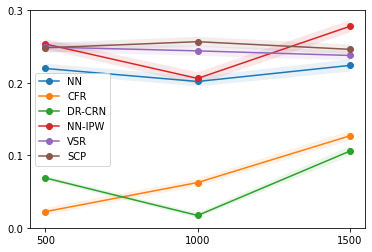

In [24]:
for method in ['dor', 'tarnet', 'drcrn', 'propensity', 'vsr', 'scp']:
    df_method = df_linear[df_linear[0] == method].copy()


    plt.fill_between(df_method['level'], df_method[2] - 1.6 * df_method[3], df_method[2] + 1.6 * df_method[3], alpha=0.1)
    plt.plot(df_method['level'], df_method[2], '-o', label=rename_dict[method])

#     plt.title(setting_dict[setting], fontsize=18)
    ax = plt.gca()
    ax.set_xticks(np.unique(df_method['level']))


    ymin, ymax = ax.get_ylim()
    custom_ticks = np.linspace(ymin, ymax, 4)
    ax.set_yticks(custom_ticks)
    ax.set_yticklabels(np.round(custom_ticks, 1))
    plt.legend()

---

In [25]:
# settings = ['confounding_level', 'n_flip', 'p_confounder_cause', 'p_cause_cause', 'n_cause', 'n_confounder']

# # setting_dict = {
# #     'confounding_level': r'Confounding level $\alpha$',
# #     'n_flip': r'Treatment distance $\delta$',
# #     'p_confounder_cause': r'Treatment-cause Sparsity $p_v$',
# #     'p_cause_cause': r'Cause-cause Sparsity $p_u$',
# #     'n_cause': r'Number of causes $K$',
# #     'n_confounder': r'Number of confounders $D$',
# # }

# setting_dict = {
#     'confounding_level': r'$\alpha$',
#     'n_flip': r'$\delta$',
#     'p_confounder_cause': r'$p_v$',
#     'p_cause_cause': r'$p_u$',
#     'n_cause': r'$K$',
#     'n_confounder': r'$D$',
# }

In [26]:
# def make_plot(setting, no_y=False, linear=True):
#     df = dat[dat[1].str.contains(setting)].copy()

#     tmp = list(df[1].str.split('_'))
#     level = [float(x[-2]) for x in tmp]
#     lineara = [(x[-1]) for x in tmp]
#     df['level'] = level
#     df['linear'] = lineara
#     if linear:
#         df_linear = df[df.linear == 'linear'].copy()
#     else:
#         df_linear = df[df.linear == 'nonlinear'].copy()
    
#     rename_dict = {
#         'dor': 'NN', 'tarnet': 'CFR', 'cfrnet': 'CFR', 'propensity': 'NN-IPW', 'vsr': 'VSR', 'scp': 'SCP', 'drcrn': 'DR-CRN'
#     }
#     for method in ['dor', 'tarnet', 'drcrn', 'propensity', 'vsr', 'scp']:
#         df_method = df_linear[df_linear[0] == method].copy()
        
#         if linear:
#             df_method = df_method[df_method[2]<1.3]
#         else:
#             df_method = df_method[df_method[2]<0.19]
    
#         # plt.locator_params(axis='y', nbins=5)

#         plt.fill_between(df_method['level'], df_method[2] - 1.6 * df_method[3], df_method[2] + 1.6 * df_method[3], alpha=0.1)
#         plt.plot(df_method['level'], df_method[2], '-o', label=rename_dict[method])
        
#         # plt.ylim(0,1)
#         # plt.ylim(0,0.18)
#         plt.title(setting_dict[setting], fontsize=18)
#         ax = plt.gca()
#         ax.set_xticks(np.unique(df_method['level']))
        
        
#         ymin, ymax = ax.get_ylim()
#         custom_ticks = np.linspace(ymin, ymax, 4)
#         ax.set_yticks(custom_ticks)
#         ax.set_yticklabels(np.round(custom_ticks, 1))

#         if no_y:
#             # ax.set_yticks([])
#             pass
#         else:
#             plt.ylabel('Root PEHE', fontsize=18)


In [27]:
# plt.figure(figsize=(16,2.5))
# plt.style.use('tableau-colorblind10')
# plt.rcParams['font.size'] = '13'

# plt.subplot(161)
# make_plot(settings[0])

# plt.subplot(162)
# make_plot(settings[1], no_y=True)


# plt.subplot(163)
# make_plot(settings[2], no_y=True)

# plt.subplot(164)
# make_plot(settings[3], no_y=True)

# plt.subplot(165)
# make_plot(settings[5], no_y=True)


# plt.subplot(166)
# make_plot(settings[4], no_y=True)


# # plt.legend(fontsize=11)
# plt.tight_layout(pad=0)

# plt.savefig(fname='linear_tight.png')

In [28]:
# plt.figure(figsize=(16,2.5))
# plt.style.use('tableau-colorblind10')
# plt.rcParams['font.size'] = '13'

# plt.subplot(161)
# make_plot(settings[0], linear=False)

# plt.subplot(162)
# make_plot(settings[1], no_y=True, linear=False)


# plt.subplot(163)
# make_plot(settings[2], no_y=True, linear=False)

# plt.subplot(164)
# make_plot(settings[3], no_y=True, linear=False)

# plt.subplot(165)
# make_plot(settings[5], no_y=True, linear=False)


# plt.subplot(166)
# make_plot(settings[4], no_y=True, linear=False)


# plt.legend(fontsize=11)
# plt.tight_layout(pad=0)

# plt.savefig(fname='nonlinear_tight.png')

---

In [29]:
# plt.figure(figsize=(10,5))

# plt.subplot(231)
# make_plot(settings[0])

# plt.subplot(232)
# make_plot(settings[1], no_y=True)


# plt.subplot(233)
# make_plot(settings[2], no_y=True)

# plt.subplot(234)
# make_plot(settings[3])

# plt.subplot(235)
# make_plot(settings[5], no_y=True)


# plt.subplot(236)
# make_plot(settings[4], no_y=True)

# plt.legend()
# plt.tight_layout()

# # plt.savefig(fname='nonlinear.png')

---

In [30]:
# setting = settings[0]

In [31]:
# df = dat[dat[1].str.contains(setting)].copy()

# tmp = list(df[1].str.split('_'))
# level = [float(x[-2]) for x in tmp]
# linear = [(x[-1]) for x in tmp]
# df['level'] = level
# df['linear'] = linear
# df_linear = df[df.linear == 'linear'].copy()

In [32]:
# rename_dict = {
#     'dor': 'NN', 'tarnet': 'CFRNET', 'cfrnet': 'CFRNET', 'propensity': 'NN-IPW', 'vsr': 'VSR', 'scp': 'SCP'
# }

In [33]:
# for method in ['dor', 'tarnet', 'propensity', 'vsr', 'scp']:
#     df_method = df_linear[df_linear[0] == method].copy()
#     df_method = df_method[df_method[2]<1.3]
#     plt.fill_between(df_method['level'], df_method[2] - 1.96 * df_method[3], df_method[2] + 1.96 * df_method[3], alpha=0.1)
#     plt.plot(df_method['level'], df_method[2], '-o', label=rename_dict[method])

# plt.legend()

# plt.xlabel(r'$\alpha > \beta$')

In [34]:
# print(plt.rcParams['axes.prop_cycle'].by_key()['color'])